3-) 

* Edinburgh mutfak eşyaları veri seti1 için hazırlanan ekteki 10 farklı nesneye ait görüntüler 
ile bir nesne sınıflandırma sistemi gerçekleştiriniz. 

* Bunun için nesnelerin RAW olarak isimlendirilmiş klasörlerindeki her bir görüntüyü okuyup 0.25 oranla yeniden 
boyutlandırınız. Bu görüntülerin her birine öncelikle ikinci maddede geliştirdiğiniz ilgi noktası bulucu algoritmayı uygulayıp ilgi noktalarının konumlarını ve ölçeklerini tespit ediniz. 

* Ardından ilgi noktalarını merkeze alan ve noktanın ölçeğine bağlı olarak boyutunu ayarlayacağınız W×W büyüklüğündeki bir pencere içerisinde 4×4 hücre ve her bir hücre için 8 uzunluklu histogramlar belirleyerek yönelimli eğimlerin histogramı (HoG) tanımlayıcısını çalıştırınız. 

* Böylece bir ilgi noktası için 128 uzunluklu bir özellik vektörü oluşturunuz. 

* HoG tanımlayıcısı OpenCV içerisinden hazır olarak kullanılabilir veya HoG’un interpolasyon aşamaları göz ardı edilerek kodlanabilir. 

* Bu şekilde tüm görüntüler için oluşturduğunuz ilgi noktalarını ve tanımlayıcılarını her nesne için IP isimli bir klasör altına görüntülerin dosya ismi ile kaydediniz. 

* İlgi noktalarını belirledikten sonra her nesnenin ilk 8 görüntüsüne ait ilgi noktalarını eğitim son 2 görüntüsüne ait olanları ise test amaçlı kullanarak k en yakın komşu nesne sınıflandırma işlemini gerçekleştiriniz. 

In [16]:
from utensils_data_read import load_data

import cv2
import matplotlib.pyplot as plt
import numpy as np

from utils import img_read, show_img, show_hist

[INFO] veri yukleniyor...


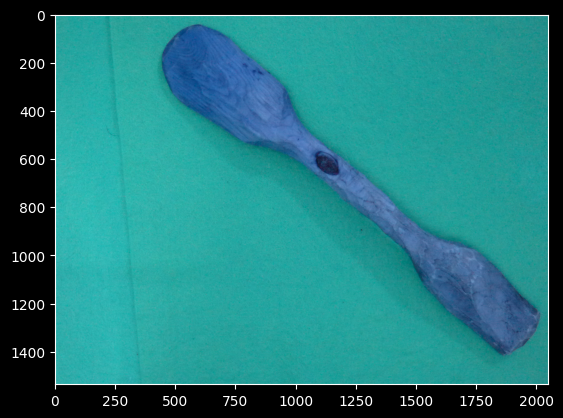

In [2]:
# Veriyi yükle ve eğitim ve test olarak ayır.
trainX, testX, trainY, testY = load_data()

trainX.shape, trainY.shape, testX.shape, testY.shape 

In [12]:
from skimage.feature import hog

# apply ROI detection

descriptors = []
for img in trainX:
    fd, hog_image = hog(image=img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    descriptors.append(fd)
    
# plot descriptors
descriptors = np.array(descriptors)

# visulize descriptors in scatter plot and color code by class
plt.scatter(descriptors[:,0], descriptors[:,1], c=range(len(trainY)))
# add a color bar
plt.colorbar()
plt.show()

e:\Yüksek Lisans\MSc_Projects\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


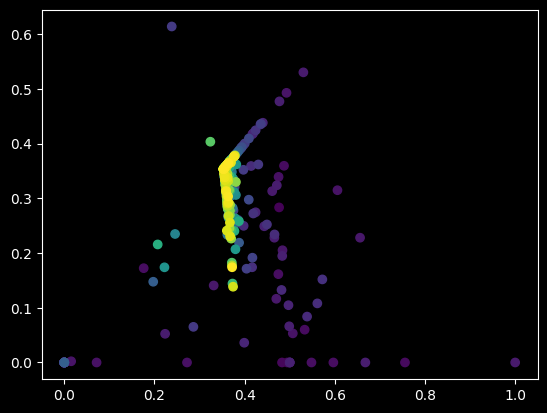

In [26]:
# apply k-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(trainY), random_state=0).fit(descriptors)

# plot the cluster centers

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c=range(len(trainY)))
